# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn

## Урок 10. Вебинар. Консультация по итоговому проекту

**Задание для курсового проекта**

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Сдача проекта:
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту")
ссылку на ноутбук в github или public kaggle notebook.
2. Необходимо получить R2 > 0.6.



Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.
____________
Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии
2. Повторяющиеся операции лучше оформлять в виде функций
3. По возможности добавлять графики, описывающие данные (около 3-5)
4. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
5. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
6. Весь проект должен быть в одном скрипте (файл ipynb).
7. При использовании статистик (среднее, медиана и т.д.) в качестве признаков,
лучше считать их на трейне, и потом на валидационных и тестовых данных не считать
статистики заново, а брать их с трейна.
8. Проект должен полностью отрабатывать за разумное время (не больше 10 минут),
поэтому в финальный вариант лучше не включать GridSearch с перебором
большого количества сочетаний параметров.


**Комментарий:** Судя по метрике R2, задача связана с регрессией.

### **Курсовой проект о ценах на жилье в Калифорнии**

Используется набор данных из проекта "California Housing Prices" из репозитория StatLib, который также был использован в книге "Hands-On Machine Learning with Scikit-Learn and TensorFlow" Аурелиена Жерона.

Этот набор данных содержит следующую информацию о жилых районах в Калифорнии:

* **longitude:** долгота географического расположения района.
* **latitude:** широта географического расположения района.
* **housing_median_age:** медианный возраст домов в районе.
* **total_rooms:** общее количество комнат в районе.
* **total_bedrooms:** общее количество спален в районе.
* **population:** население района.
* **households:** количество домохозяйств в районе.
* **median_income:** медианный доход домохозяйств в районе.
* **median_house_value:** медианная стоимость домов в районе (целевая переменная для задачи регрессии).

Данные обычно используются для анализа рынка недвижимости и предсказания стоимости жилья в зависимости от различных факторов, таких как экономические и демографические характеристики района.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL для скачивания набора данных о жилье в Калифорнии
data_url = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'

In [3]:
# Скачиваем данные и загружаем в DataFrame
housing_data = pd.read_csv(data_url)

In [4]:
# Просмотр данных
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


**Комментарий:** Набор данных о жилье в Калифорнии, который содержит следующие признаки:

* longitude: долгота;
* latitude: широта;
* housing_median_age: медианный возраст жилья;
* total_rooms: общее количество комнат;
* total_bedrooms: общее количество спален;
* population: население;
* ouseholds: количество домохозяйств;
* median_income: медианный доход;
* median_house_value: медианная стоимость дома (целевая переменная).

In [5]:
# Разделение данных на признаки и целевую переменную
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

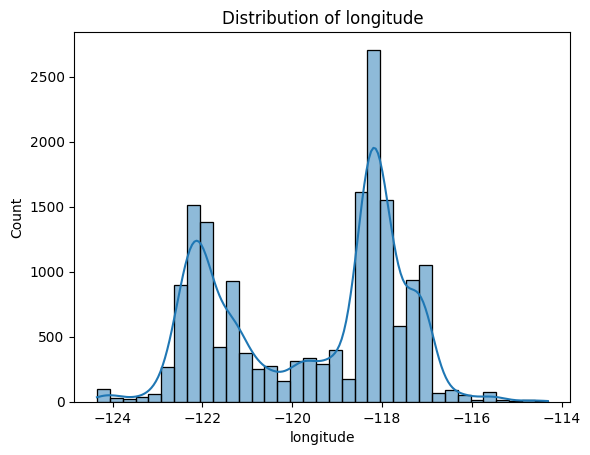

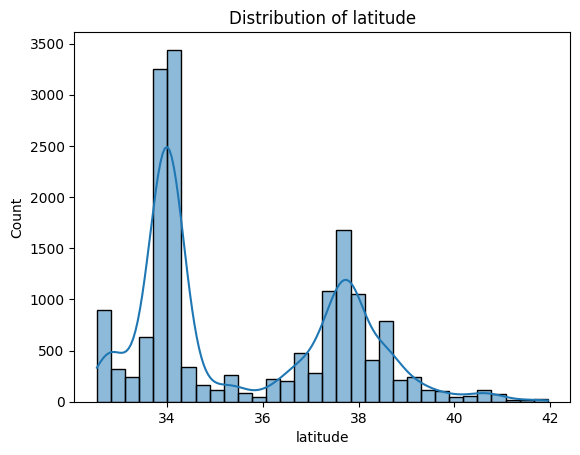

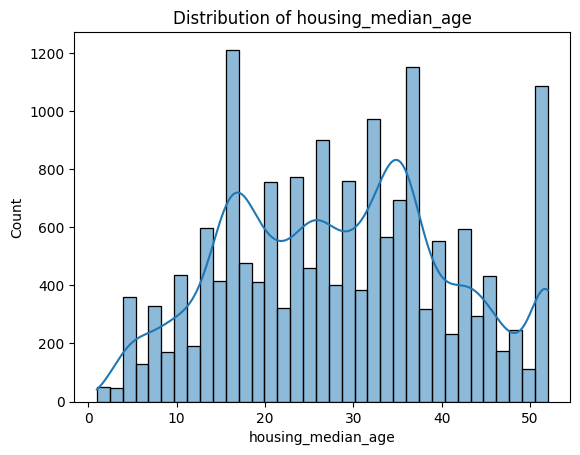

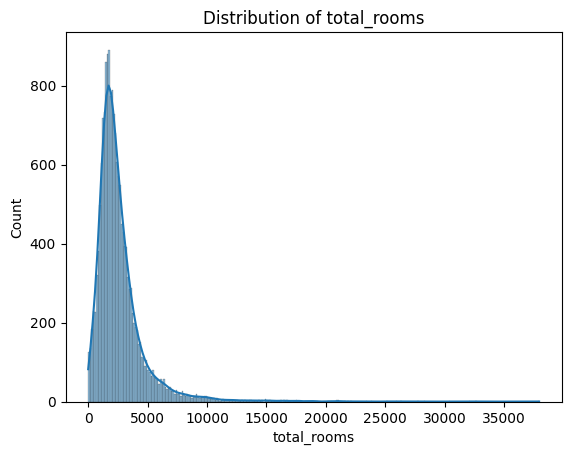

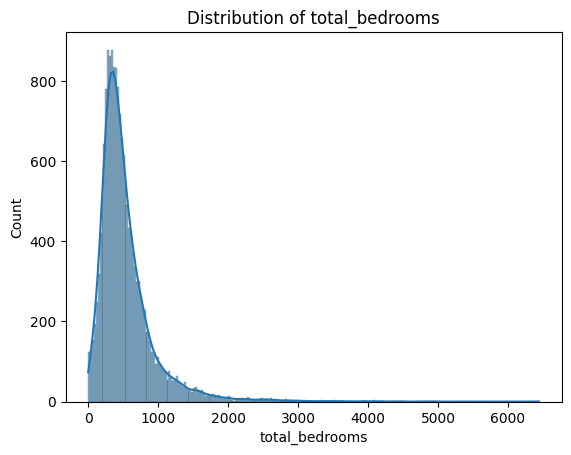

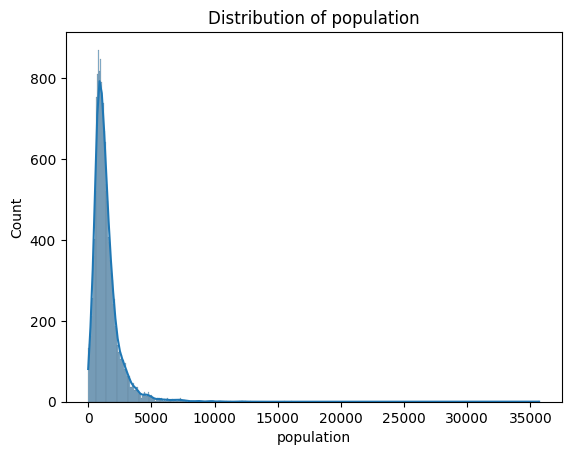

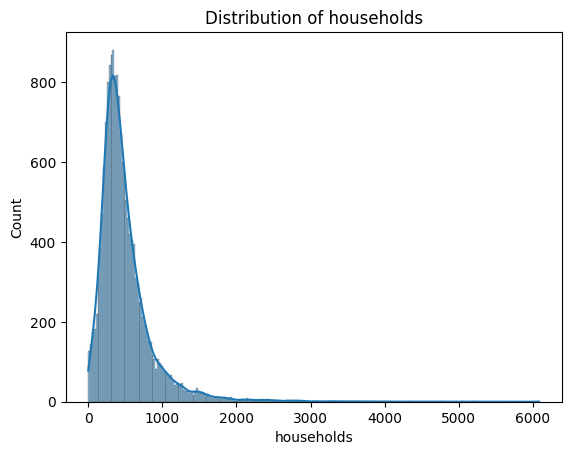

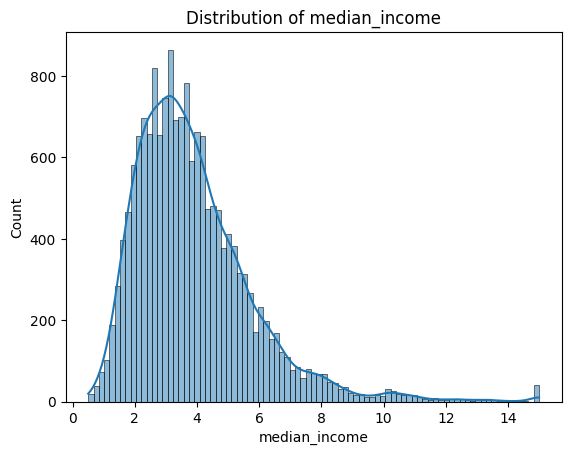

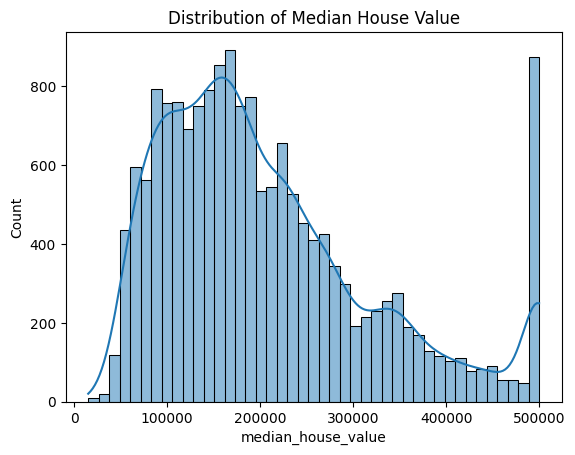

In [6]:
# Разведочный анализ данных (EDA)
# Визуализация распределений признаков и целевой переменной
features = list(X.columns)
for feature in features:
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

sns.histplot(y, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

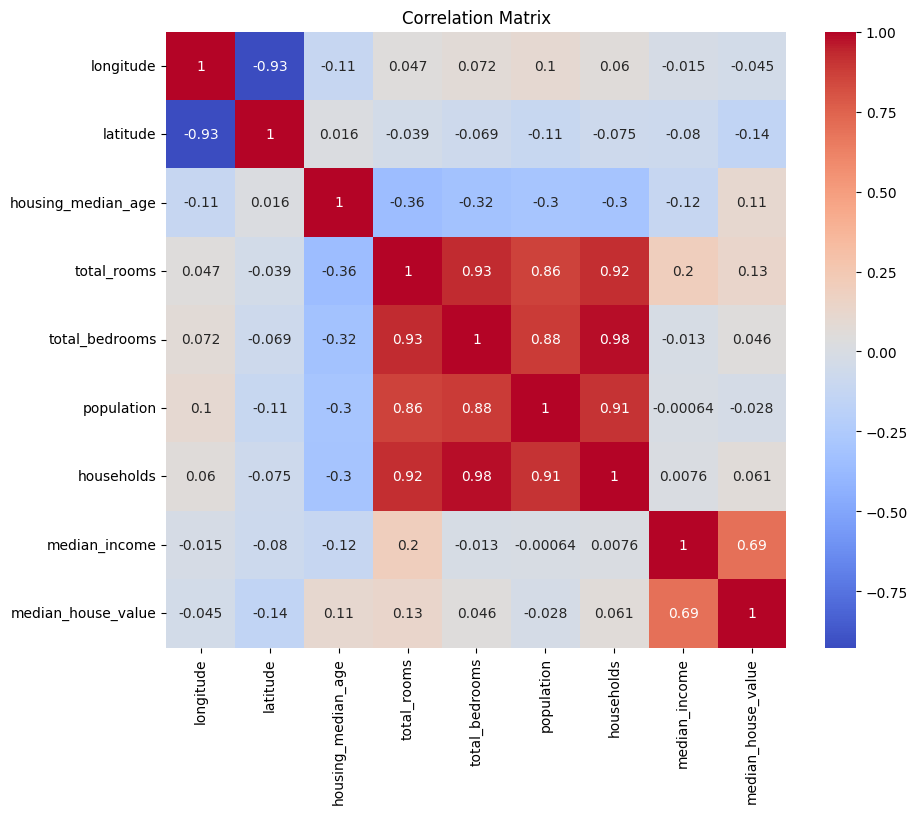

In [7]:
# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Обработка пропусков
# Проверка на наличие пропусков и их обработка
print(housing_data.isnull().sum())
# Если есть пропуски, можно заполнить их, например, медианными значениями:
# housing_data.fillna(housing_data.median(), inplace=True)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


**Комментарий:** Вывод по обработке пропусков показывает, что в наборе данных отсутствуют пропуски во всех столбцах.

In [9]:
# Построение новых признаков
# Например, создание признака "Количество комнат на домохозяйство"
X['RoomsPerHousehold'] = X['total_rooms'] / X['households']

In [10]:
# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Построение модели
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Прогнозирование на тестовом датасете
y_pred = model.predict(X_test)

In [13]:
# Оценка модели
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

R2 score: 0.8184524999789096


**Комментарий:** Значение коэффициента детерминации R2, равное 0.8184524999789096, показывает, что модель хорошо объясняет изменчивость целевой переменной. R2 варьируется от 0 до 1, где близкое к 1 значение указывает на то, что модель предоставляет хорошее приближение реальных данных.

In [14]:
# Убедимся, что R2 > 0.6 на тестовых данных
assert r2 > 0.6, "R2 Score is below 0.6, try to improve your model."

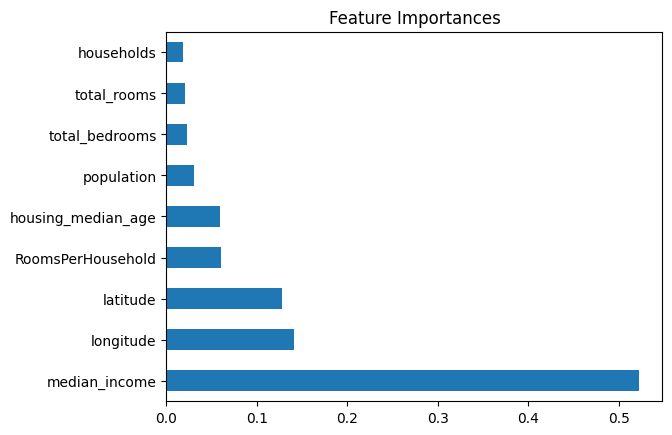

In [15]:
# Визуализация важности признаков
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

**Выводы:**

Анализ важности признаков (Feature Importances) показывает, какие признаки вносят наибольший вклад в предсказательную способность модели. В данном случае, признак median_income имеет наибольшую важность с весом выше 0.5, что указывает на его значительное влияние на медианную стоимость дома. Признаки latitude и longitude также вносят существенный вклад, хотя их важность ниже (выше 0.1, но не достигает 0.2).

Признаки households, total_rooms, total_bedrooms, population, housing_median_age и RoomsPerHousehold имеют относительно низкую важность (меньше 0.1), что говорит о том, что они менее важны для модели по сравнению с другими признаками.

In [16]:
# Сохранение предсказаний в CSV файл (без индексов)
predictions = pd.DataFrame(y_pred, columns=['Predicted_MedHouseVal'])
predictions.to_csv('california_housing_predictions.csv', index=False, header=True)